In [3]:
%%HTML

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style="whitegrid")

# Predicting the Rate of Death Due to Opioid Addiction At the County Level

## What is the opioid epidemic?

Wikipedia defines the opioid epidemic as the following:

> The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs  in the United States and Canada beginning in the late 1990s and continuing throughout the next two decades. Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin.

*Source: https://en.wikipedia.org/wiki/Opioid_epidemic *

### From 1999 to 2016 in America, the increase in deaths due to opioid overdose increased by 425%, from 8,050 deaths in 1999 to 42,249 deaths in 2016. That's over four times the increase in 17 years.

/root/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/root/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


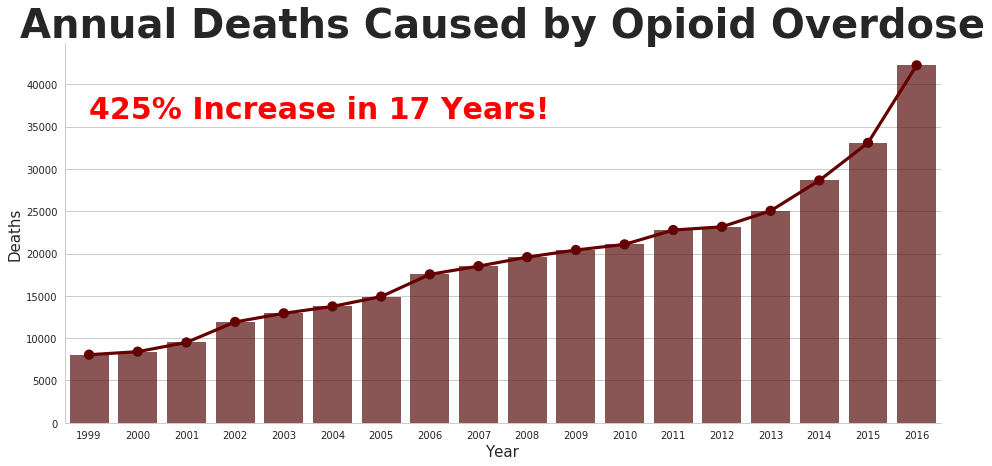

In [5]:
# read in opioid death data with age, sex, and ethnicity information
opioid_deaths = pd.read_csv('opioid_deaths.csv')

# calculate sum of deaths by year
totals = opioid_deaths.groupby('Year').Deaths.sum().reset_index()

# bar plot with line plot overlaid
g = sns.FacetGrid(totals, size = 6, aspect = 2.2)
g = g.map(sns.barplot, 'Year', 'Deaths', color = '#660000', alpha = 0.7)
g = g.map(sns.pointplot, 'Year', 'Deaths', color = '#660000')
# g.set_axis_labels("Year","Deaths")
plt.title('Annual Deaths Caused by Opioid Overdose', fontsize = 40, fontweight = 'bold')
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Deaths", fontsize = 15)
plt.text(x = 0, y = 36000, s = "425% Increase in 17 Years!", fontsize = 30, color = 'red', fontweight = 'bold')
plt.show()

## Reading Between the Numbers - Why We Should Care

Many are dying because of opioid overdose. But it's not just death. Many people that are not represented in these death numbers are struggling with opioid addiction. Not only does opioid addiction destroy the health of the addicted individual, but it also negatively impacts the lives of the addicted person's loved ones, his or her families, and, ultimately, the communities at large. Dangers of opioid addiction to communities have been recognized by other nations as well. For example, in the 1950s, because of the destroyed lives and communities by opioid addiction, China not only banned opium, but it also executed those who were caught selling opium. 

Addiction to opioids, like any other addictions, leads to financial problems, health problems, lack of self control, relational difficulties, and ultimately destroys every aspect of the person, and the end result is death. Watch the video (https://youtu.be/VpEQaa6jzUU) of the story of Amy and her struggle with opioid addiction to see a glimpse of the struggles that come with opioid addiction.

In [6]:
%%HTML
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/VpEQaa6jzUU?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>

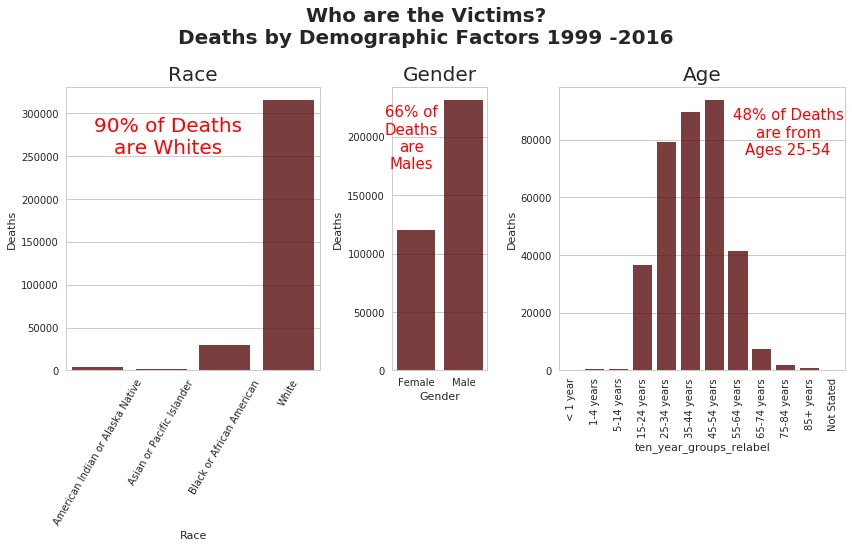

In [20]:
# create subplot with three columns and one row
f, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={"width_ratios": (.4, .15, .45)})
f.suptitle('Who are the Victims?\nDeaths by Demographic Factors 1999 -2016', fontsize = 20, fontweight = 'bold')

# first subplot:
# calculate sum of deaths by year
race = opioid_deaths.groupby('Race').Deaths.sum().reset_index()
# plot bar plot
sns.barplot(x = 'Race', y = 'Deaths', data = race, ax=ax1, color = '#660000', alpha = 0.8)
ax1.set_xticklabels(list(race.Race.unique()), rotation = 60)
ax1.set_title('Race', fontsize = 20)
ax1.text(0.4, 0.75, '90% of Deaths\nare Whites',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax1.transAxes,
        color='red', fontsize=20)

# second subplot:
# calculate sum of deaths by year
gender = opioid_deaths.groupby('Gender').Deaths.sum().reset_index()
# plot bar plot
sns.barplot(x = 'Gender', y = 'Deaths', data = gender, ax=ax2, color = '#660000', alpha = 0.8)
ax2.set_xticklabels(list(gender.Gender.unique()))
ax2.set_title('Gender', fontsize = 20)
ax2.text(0.2, 0.7, '66% of\nDeaths\nare\nMales',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax2.transAxes,
        color='red', fontsize=15)

# third subplot:
age = opioid_deaths.groupby('ten_year_groups_relabel').Deaths.sum().reset_index()
# calculate sum of deaths by year
age = opioid_deaths.groupby('ten_year_groups_relabel').Deaths.sum().reset_index()
# plot bar plot
sns.barplot(x = 'ten_year_groups_relabel', y = 'Deaths', data = age, ax = ax3, color = '#660000', alpha = 0.8)
# create appropriate label for x tick marks
xticks_label = list(opioid_deaths.loc[:, ['Ten-Year Age Groups', 'ten_year_groups_relabel']].drop_duplicates().iloc[:, 0])
ax3.set_xticklabels(xticks_label, rotation = 90)
ax3.set_title('Age', fontsize = 20)
ax3.text(0.8, 0.75, '48% of Deaths\nare from\nAges 25-54',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax3.transAxes,
        color='red', fontsize=15)


plt.tight_layout(rect = [0, 0.03, 1, 0.9])
plt.show()

## Top Ten Counties with Highest Mortality Rate Caused by Opioid Overdose in 2016

In [8]:
# read in the data
merged_data = pd.read_csv('merged_data.csv')

# obtain the location of columns I want to select - ['county_y', 'state', 'population', 'deaths', 'crude_rate']
wanted_columns = [merged_data.columns.get_loc(column_label) for column_label in ['county_y', 'state', 'population', 'deaths', 'crude_rate']]
# ten counties with highest crude_rate
merged_data.sort_values('crude_rate', ascending = False).iloc[:10, wanted_columns]

,county_y,state,population,deaths,crude_rate
121,Harrison,KY,18646.0,22.0,118.0
405,Cabell,WV,95987.0,87.0,90.6
412,Wayne,WV,40531.0,34.0,83.9
409,Mingo,WV,24647.0,20.0,81.1
149,Baltimore City,MD,614664.0,468.0,76.1
219,Rio Arriba,NM,40040.0,29.0,72.4
404,Berkeley,WV,113525.0,82.0,72.2
133,Washington,ME,31450.0,22.0,70.0
408,Mercer,WV,60468.0,37.0,61.2
118,Campbell,KY,92211.0,55.0,59.6


Based on the table, we see that **Harrison, KY** is the county that had the highest mortality rate per 100,000 people caused by opioid overdose with **118 deaths per 100,000 people due to opioid overdose**. In terms of state, we see that **West Virginia** has five counties in the top ten highest mortality rate per 100,000 people caused by opioid overdose.

## What is the problem I want to solve?

The problem I want to solve is predicting the United States' county's mortality rate per 100,000 people caused by opioid overdose for 2016 given a county’s median household income, population estimate, unemployment rate, poverty rate estimate, educational attainment, and opioid prescription rate by health care providers.

## Datasets

I gathered data from the following sources and combined them into one dataframe.

* US County Opioid Prescribing Rates 2016
    * https://www.cdc.gov/drugoverdose/maps/rxcounty2016.html
* Unemployment, median household income, educational attainment, poverty rate estimates,and population estimates:
    * https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
* Underlying Cause of Death
    * https://raw.githubusercontent.com/danielhanbitlee/Springboard/master/capstone_project/drug_overdose_death_opioid_2016.txt
    * https://wonder.cdc.gov/controller/saved/D77/D39F042
        * Note that statistics representing zero to nine deaths are suppressed at the region, state and county level.

## Variables

The following are the variables included in the main dataset that is used for analysis. In bold are the variable names. Some of the variables have descriptions of what the variables represent.

1. **Bachelor's degree or higher 2012-2016**  
2. **Births_2016** - Births in period 7/1/2015 to 6/30/2016
* **Civilian_labor_force_2016** - Civilian labor force annual average, 2016
* **county_y** - County's name
* **crude_rate** - Estimated rate for deaths caused by opioid overdose in the county for 2016 per 100,000 people
    * Specifically, the types of drug-related deaths include the following:
        * Drug poisonings (overdose)
        * Unintentional
        * Suicide
        * Homicide
        * Undetermined
    * The specific drugs included in the death rates are the following:
        * Opium
        * Heroin
        * Other opioids
        * Methadone
        * Other synthetic narcotics
        * Other and unspecified narcotics    
          
          
* **Deaths_2016** - Deaths in period 7/1/2015 to 6/30/2016  
* **DOMESTIC_MIG_2016** - Net domestic migration in period 7/1/2015 to 6/30/2016  
* **Employed_2016** - Number employed annual average, 2016  
* **fips_code** - County's unique code  
* **GQ_ESTIMATES_2016** - 7/1/2016 Group Quarters total population estimate 
    *  all people not living in housing units (house, apartment, mobile home, rented rooms)
    * e.g. people living in correctional facilities  

* **High school diploma only 2012-2016**  
* **INTERNATIONAL_MIG_2016** - Net international migration in period 7/1/2015 to 6/30/2016  
* **Less than a high school diploma 2012-2016**  
* **Med_HH_Income_Percent_of_State_Total_2016** - County Household Median Income as a percent of the State Total Median Household Income, 2016  
* **Median_Household_Income_2016** - Estimate of Median household Income, 2016  
* **N_POP_CHG_2016** - Numeric Change in resident total population 7/1/2015 to 7/1/2016  
* **NATURAL_INC_2016** - Natural increase in period 7/1/2015 to 6/30/2016  
    * how much the population is going up or down based on how many people are being born or dying, not taking into account when people move  
    
* **NET_MIG_2016** - Net migration in period 7/1/2015 to 6/30/2016  
* **PCTPOV017_2016** - Estimated percent of people age 0-17 in poverty 2016  
* **PCTPOV517_2016** - Estimated percent of related children age 5-17 in families in poverty 2016  
* **PCTPOVALL_2016** - Estimated percent of people of all ages in poverty 2016  
* **Percent of adults completing some college or associate's degree 2012-2016**  
* **Percent of adults with a bachelor's degree or higher 2012-2016**  
* **Percent of adults with a high school diploma only 2012-2016**  
* **Percent of adults with less than a high school diploma 2012-2016**  
* **population** - Estimated population for the county in 2016  
* **POV017_2016** - Estimate of people age 0-17 in poverty 2016  
* **POV517_2016** - Estimate of related children age 5-17 in families in poverty 2016  
* **POVALL_2016** - Estimate of people of all ages in poverty 2016  
* **prescribe_rate** - Prescription rate for opioids for the county  
* **R_birth_2016** - Birth rate in period 7/1/2015 to 6/30/2016  
* **R_death_2016** - Death rate in period 7/1/2015 to 6/30/2016  
* **R_DOMESTIC_MIG_2016 R_NET_MIG_2016** - Net domestic migration rate in period 7/1/2015 to 6/30/2016  
* **R_INTERNATIONAL_MIG_2016** - Net international migration rate in period 7/1/2015 to 6/30/2016  
* **R_NATURAL_INC_2016** - Natural increase rate in period 7/1/2015 to 6/30/2016  
    * rate at which the population is going up or down based on how many people are being born or dying, not taking into account when people move  
    
* **RESIDUAL_2016** - Residual for period 7/1/2015 to 6/30/2016  
    * population change that cannot be attributed to any specific demographic component of population change  
    
* **Some college or associate's degree 2012-2016**  
* **state** - State the county is in  
* **Unemployed_2016** - Number unemployed annual average, 2016  
* **Unemployment_rate_2016** - Unemployment rate, 2016  

## Exploratory Data Analysis

In [9]:
merged_data.columns

Index(['fips_code', 'deaths', 'population', 'crude_rate', 'county_y', 'state',
       'prescribe_rate', 'POVALL_2016', 'CI90LBAll_2016', 'CI90UBALL_2016',
       'PCTPOVALL_2016', 'CI90LBALLP_2016', 'CI90UBALLP_2016', 'POV017_2016',
       'CI90LB017_2016', 'CI90UB017_2016', 'PCTPOV017_2016', 'CI90LB017P_2016',
       'CI90UB017P_2016', 'POV517_2016', 'CI90LB517_2016', 'CI90UB517_2016',
       'PCTPOV517_2016', 'CI90LB517P_2016', 'CI90UB517P_2016', 'MEDHHINC_2016',
       'CI90LBINC_2016', 'POP_ESTIMATE_2016', 'N_POP_CHG_2016', 'Births_2016',
       'Deaths_2016', 'NATURAL_INC_2016', 'INTERNATIONAL_MIG_2016',
       'DOMESTIC_MIG_2016', 'NET_MIG_2016', 'RESIDUAL_2016',
       'GQ_ESTIMATES_2016', 'R_birth_2016', 'R_death_2016',
       'R_NATURAL_INC_2016', 'R_INTERNATIONAL_MIG_2016', 'R_DOMESTIC_MIG_2016',
       'R_NET_MIG_2016', 'Less than a high school diploma, 2012-2016',
       'High school diploma only, 2012-2016',
       'Some college or associate's degree, 2012-2016',
       'B

In [10]:
# remove columns representing confidence intervals
merged_noCI = merged_data.loc[:, [column for column in merged_data.columns if 'CI' not in column]]

In [11]:
# remove redundant columns - median household income and population estimate
merged_filtered = merged_noCI.loc[:, ['fips_code', 'population', 'crude_rate', 'county_y', 'state',
       'prescribe_rate', 'POVALL_2016', 'PCTPOVALL_2016', 'POV017_2016',
       'PCTPOV017_2016', 'POV517_2016', 'PCTPOV517_2016',
       'N_POP_CHG_2016', 'Births_2016', 'Deaths_2016',
       'NATURAL_INC_2016', 'INTERNATIONAL_MIG_2016', 'DOMESTIC_MIG_2016',
       'NET_MIG_2016', 'RESIDUAL_2016', 'GQ_ESTIMATES_2016', 'R_birth_2016',
       'R_death_2016', 'R_NATURAL_INC_2016', 'R_INTERNATIONAL_MIG_2016',
       'R_DOMESTIC_MIG_2016', 'R_NET_MIG_2016',
       'Less than a high school diploma, 2012-2016',
       'High school diploma only, 2012-2016',
       'Some college or associate\'s degree, 2012-2016',
       'Bachelor\'s degree or higher, 2012-2016',
       'Percent of adults with less than a high school diploma, 2012-2016',
       'Percent of adults with a high school diploma only, 2012-2016',
       'Percent of adults completing some college or associate\'s degree, 2012-2016',
       'Percent of adults with a bachelor\'s degree or higher, 2012-2016',
       'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016',
       'Unemployment_rate_2016', 'Median_Household_Income_2016',
       'Med_HH_Income_Percent_of_State_Total_2016']]

### Distribution of County's Crude Death Rate Caused By Opioid Overdose 2016

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


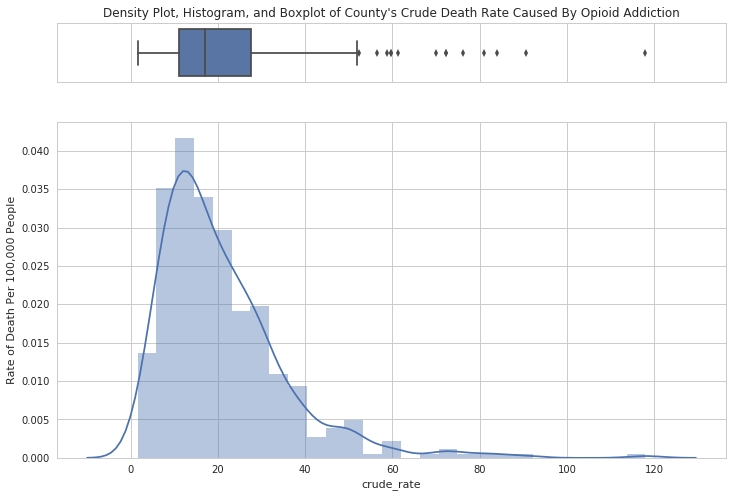

In [24]:
# resize figures
plt.rcParams['figure.figsize'] = [12, 8]

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(merged_filtered['crude_rate'], ax=ax_box)
sns.distplot(merged_filtered['crude_rate'], ax=ax_hist)
plt.ylabel('Rate of Death Per 100,000 People')
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title = "Density Plot, Histogram, and Boxplot of County's Crude Death Rate Caused By Opioid Addiction")
plt.show()

Based on the distribution of the crude death rate, we see that most counties have death rates in the range of 0 to 40 deaths per 100,000 people.

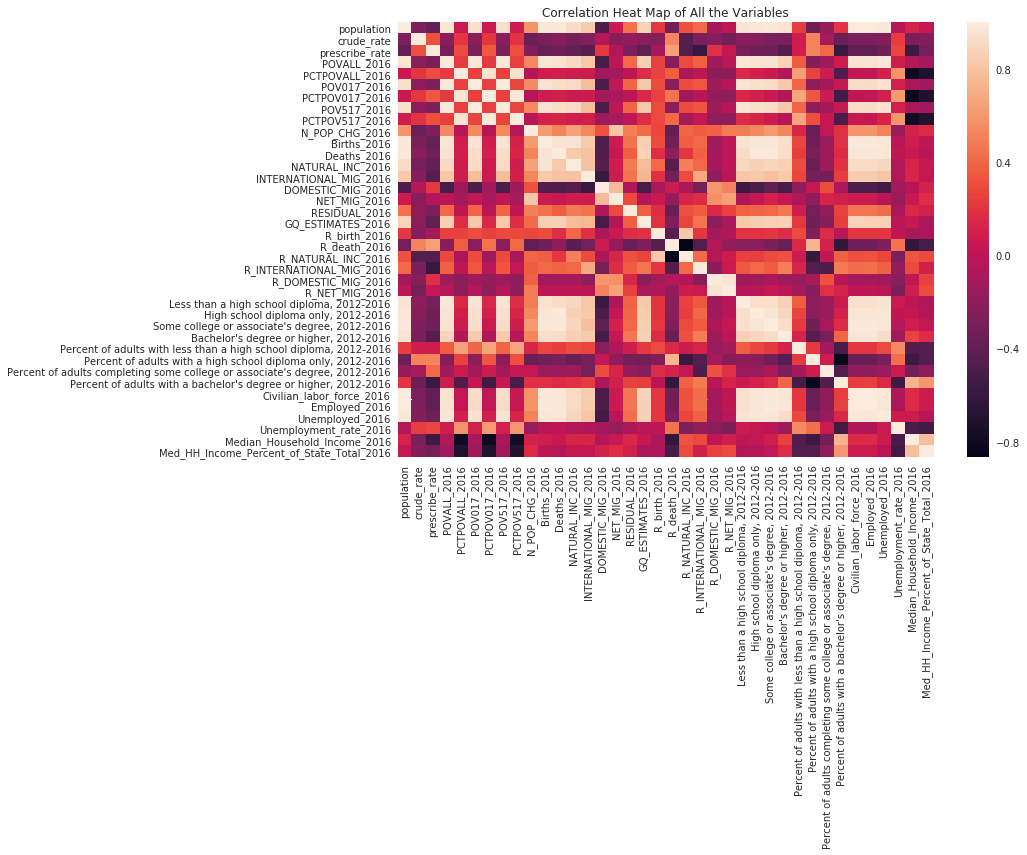

In [25]:
# remove fips_code, county_y, and state columns to prepare data for creating correlation matrix
merged_remove = merged_filtered.loc[:, ['population', 'crude_rate',
       'prescribe_rate', 'POVALL_2016', 'PCTPOVALL_2016', 'POV017_2016',
       'PCTPOV017_2016', 'POV517_2016', 'PCTPOV517_2016', 'N_POP_CHG_2016',
       'Births_2016', 'Deaths_2016', 'NATURAL_INC_2016',
       'INTERNATIONAL_MIG_2016', 'DOMESTIC_MIG_2016', 'NET_MIG_2016',
       'RESIDUAL_2016', 'GQ_ESTIMATES_2016', 'R_birth_2016', 'R_death_2016',
       'R_NATURAL_INC_2016', 'R_INTERNATIONAL_MIG_2016', 'R_DOMESTIC_MIG_2016',
       'R_NET_MIG_2016', 'Less than a high school diploma, 2012-2016',
       'High school diploma only, 2012-2016',
       'Some college or associate\'s degree, 2012-2016',
       'Bachelor\'s degree or higher, 2012-2016',
       'Percent of adults with less than a high school diploma, 2012-2016',
       'Percent of adults with a high school diploma only, 2012-2016',
       'Percent of adults completing some college or associate\'s degree, 2012-2016',
       'Percent of adults with a bachelor\'s degree or higher, 2012-2016',
       'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016',
       'Unemployment_rate_2016', 'Median_Household_Income_2016',
       'Med_HH_Income_Percent_of_State_Total_2016']]

# correlation heatmap
sns.heatmap(merged_remove.corr())
plt.title('Correlation Heat Map of All the Variables')
plt.show()

From the heatmap, it seems as though there are definitely highly correlated variables that contain redundant data. I will remove highly correlated variables later.

Next, let's focus on correlation between crude death rate and all other variables.

## Correlation Between Crude Death Rate and Other Variables

In [26]:
# calculate pairwise Pearson's correlation for all the variables
merged_corr = merged_filtered.corr()

# drop crude_rate row from merged_corr and select only the column for crude_rate
crude_rate_corr = merged_corr.drop('crude_rate', axis = 0).crude_rate.sort_values()

# sorted correlations between crude_rate and all other variables
crude_corr_df = pd.DataFrame({
                              'abs_corr': abs(crude_rate_corr),
                              'crude_rate_corr': crude_rate_corr 
                              }).sort_values('abs_corr', ascending = False).reset_index()
crude_corr_df.columns = ['variable', 'abs_corr', 'crude_rate_corr']

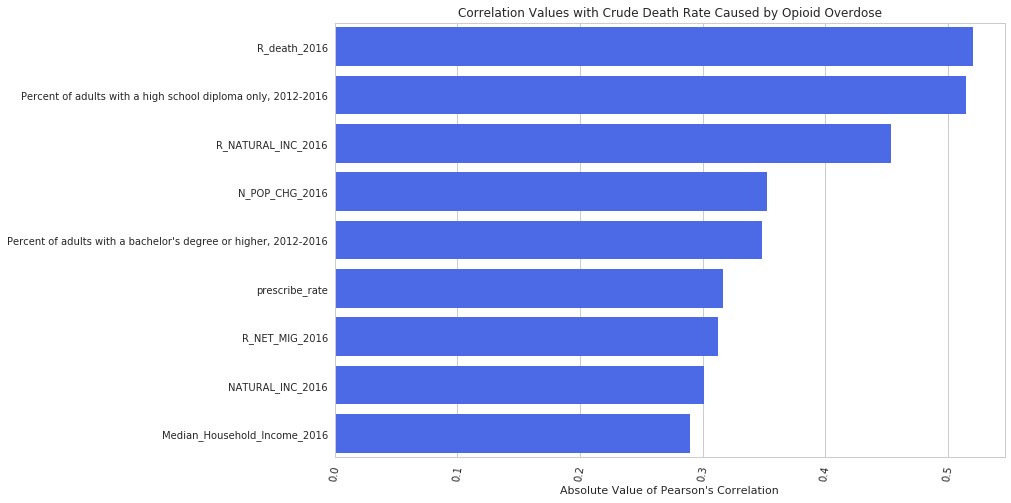

In [27]:
# barplot of nine highest correlation values when calculating correlation with crude rate of death
sns.barplot(x = 'abs_corr', y = 'variable', data = crude_corr_df[:9], color = '#335AFF')
plt.xticks(rotation = 80)
plt.title('Correlation Values with Crude Death Rate Caused by Opioid Overdose')
plt.ylabel('')
plt.xlabel('Absolute Value of Pearson\'s Correlation')
plt.show()

In [28]:
crude_corr_df[:9]

,variable,abs_corr,crude_rate_corr
0,R_death_2016,0.520507,0.520507
1,Percent of adults with a high school diploma o...,0.514949,0.514949
2,R_NATURAL_INC_2016,0.454021,-0.454021
3,N_POP_CHG_2016,0.352324,-0.352324
4,Percent of adults with a bachelor's degree or ...,0.348857,-0.348857
5,prescribe_rate,0.316618,0.316618
6,R_NET_MIG_2016,0.312791,-0.312791
7,NATURAL_INC_2016,0.301535,-0.301535
8,Median_Household_Income_2016,0.289774,-0.289774


From above bar plot and dataframe, we can see that the top three variables most correlated with crude death rate are the death rate in the county per 1,000 people, percent of adults with a high school diploma only.

### Scatter Plots

Let's see the scatter plots between crude death rate and the top nine variables that have high Pearson's correlation value.

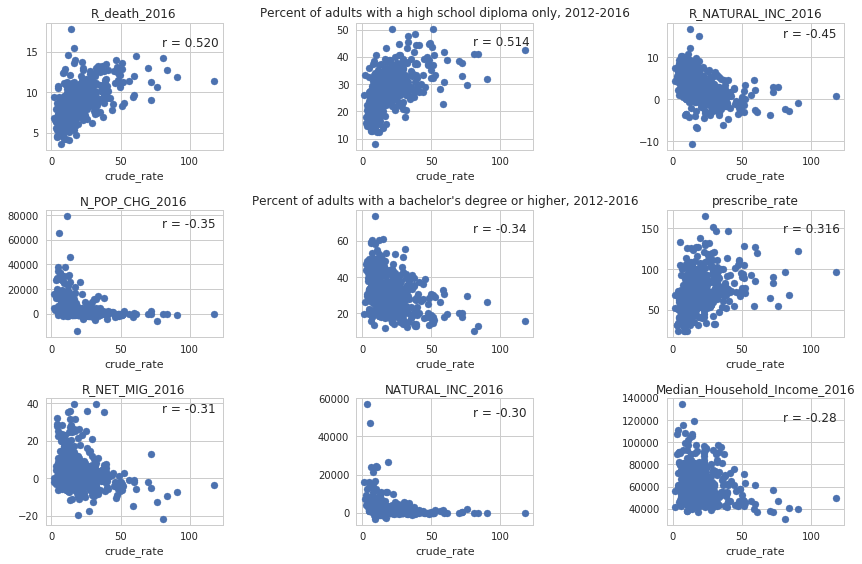

In [29]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.scatter(x = 'crude_rate', y = crude_corr_df.variable[i], data = merged_filtered)
    plt.xlabel('crude_rate')
    plt.title('{}'.format(crude_corr_df.variable[i]))
    values = merged_filtered.loc[:, '{}'.format(crude_corr_df.variable[i])]
    plt.text(80, 0.88 * max(values), 
             "r = " + str(crude_corr_df.crude_rate_corr[i])[:5])
plt.tight_layout()
plt.show()

### Violin Plots of Nine Variables with High Correlation Values

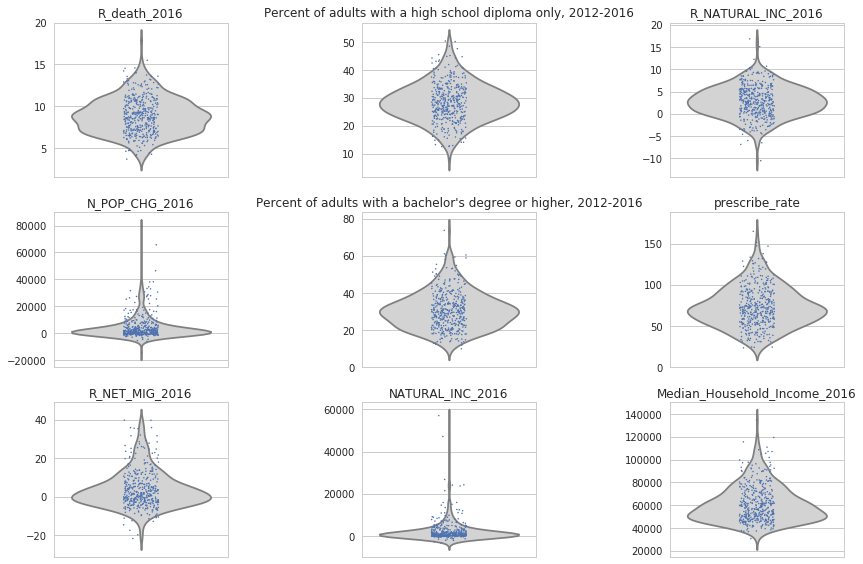

In [30]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y = crude_corr_df.variable[i], data = merged_filtered, inner = None, color = 'lightgray')
    sns.stripplot(y = crude_corr_df.variable[i], data = merged_filtered, size = 1.5, jitter = True)
    plt.ylabel('')
    plt.title('{}'.format(crude_corr_df.variable[i]))
plt.tight_layout()
plt.show()

From these violin plots, I see that N_POP_CHG_2016 and NATURAL_INC_2016 are heavily right-skewed. Most other distributions that resembe somewhat skewed normal distributions.

## Conclusion From Exploratory Data Analysis

It seems as if the the counties with higher rate of deaths caused by opioid addiction have the following:
* Higher overall rate of death
* Have more adults with high school diplomas only
* Higher opioid prescription rates
* Lower net migration rates
* Lower median household income  

The reason why counties with higher mortality rate caused by opioid overdose tend to come from counties with higher overall mortality rate should be investigated further. One reason that these counties have such high mortality rates could be that the population in these counties are older. Another reason could be that these counties may not have good access to healthcare for the residents. This can be something on which we can do more research.